In [3]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [206]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

# Chapter 06

This chapter formalizes the concept of $d$-separation and introduces the concept of estimand. We learn how $d$-separation in a graph translates to regression analysis. Next, we focus on estimands. We define basic yet powerful estimands: back-door and front-door criteria. Next, we introduce other criteria and the concept of Pearl’s $do$-calculus. Finally, we translate our new knowledge into Python code and perform a couple of exercises to solidify our new knowledge.

## Visualizations

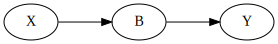

In [15]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!']

edges = ['XB', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_00')

graph

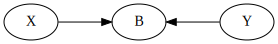

In [18]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!']

edges = ['XB', 'YB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_01')

graph

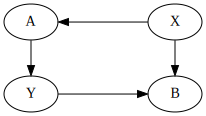

In [27]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1,1!', '3,1!', '3,0!', '1, 0!']

edges = ['XB', 'YB', 'XA', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_02')

graph

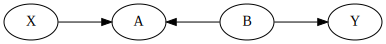

In [34]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1.5,0!', '0,0!', '3,0!', '4.5,0!']

edges = ['XA', 'BA', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_03')

graph

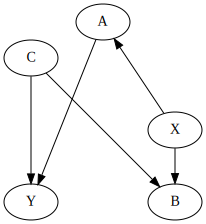

In [26]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y', 'C']
positions = ['2,2.5!', '3,1!', '3,0!', '1, 0!', '1,2!']

edges = ['XA', 'XB', 'CB', 'CY', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_04')

graph

## Estimand first!

In [74]:
# Commute example
t = [22.1, 23.7, 25.2, 20.0, 21.8]

In [75]:
np.mean(t)

22.56

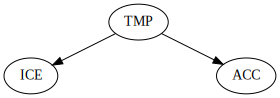

In [80]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['ICE', 'TMP', 'ACC']
positions = ['0,0!', '1.5,.75!', '3,0!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edge('TMP', 'ICE')
graph.edge('TMP', 'ACC')

graph.render(f'img/ch_06_icecream')

graph

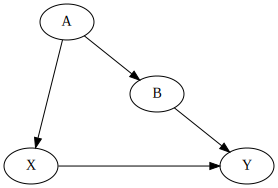

In [187]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(['XY', 'AX', 'AB', 'BY'])

graph.render(f'img/ch_06_equivalent_estimands_00')

graph

In [191]:
?graph.edge

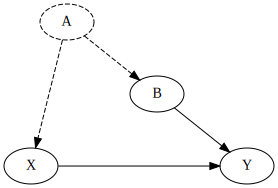

In [211]:
graph = graphviz.Digraph(format='png', engine='neato')


nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('A', style='dashed')

graph.edges(['XY', 'BY'])
graph.edge('A', 'X', style='dashed')
graph.edge('A', 'B', style='dashed')

graph.render(f'img/ch_06_equivalent_estimands_01')

graph

## Front-door criterion

In [212]:
from dowhy.causal_model import CausalModel

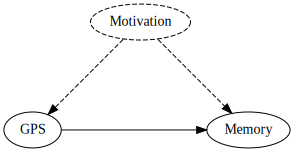

In [219]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Memory', 'Motivation']
positions = ['0,0!', '3,0!', '1.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Memory')

graph.render(f'img/ch_06_gps_01')

graph

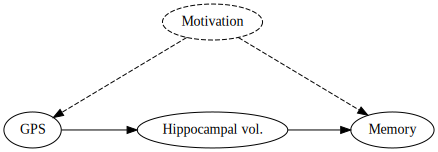

In [226]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Hippocampal vol.', 'Memory', 'Motivation']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Hippocampal vol.')
graph.edge('Hippocampal vol.', 'Memory')

graph.render(f'img/ch_06_gps_02')

graph

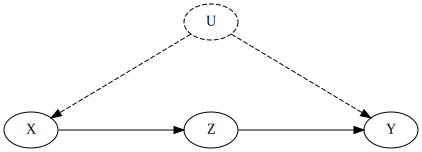

In [790]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Z', 'Y', 'U']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('U', style='dashed')

graph.edge('U', 'X', style='dashed')
graph.edge('U', 'Y', style='dashed')
graph.edge('X', 'Z')
graph.edge('Z', 'Y')

graph.render(f'img/ch_06_gps_03')

graph

### The linear promised land

In [788]:
from sklearn.linear_model import LinearRegression

In [568]:
# First, we'll build a structural causal model (SCM)
class GPSMemorySCM:
    
    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_x = stats.truncnorm(0, np.infty, scale=5)
        self.u_y = stats.norm(scale=2)
        self.u_z = stats.norm(scale=2)
        self.u = stats.truncnorm(0, np.infty, scale=4)
        
    def sample(self, sample_size=100, treatment_value=None):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)
        
        u_x = self.u_x.rvs(sample_size)
        u_y = self.u_y.rvs(sample_size)
        u_z = self.u_z.rvs(sample_size)
        u = self.u.rvs(sample_size)
        
        if treatment_value:
            gps = np.array([treatment_value]*sample_size)
        else:
            gps = u_x + 0.7*u
            
        hippocampus = -0.6*gps + 0.25*u_z
        memory = 0.7*hippocampus + 0.25*u
        
        return gps, hippocampus, memory
    
    def intervene(self, treatment_value, sample_size=100):
        """Intervenes on the SCM"""
        return self.sample(treatment_value=treatment_value, sample_size=sample_size)

In [589]:
# Instantiate the SCM
scm = GPSMemorySCM()

# Run an experiment
treatments = []
experiment_results = []

# Sample over various treatments
for treatment in np.arange(1, 21):
    gps_hours, hippocampus, memory = scm.intervene(treatment_value=treatment, sample_size=30)
    experiment_results.append(memory)
    treatments.append(gps_hours)

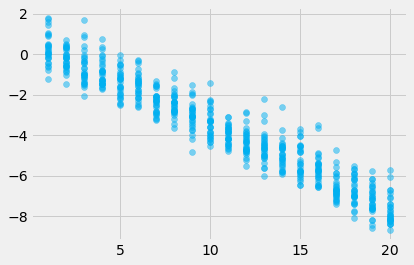

In [591]:
plt.scatter(treatments, experiment_results, alpha=.5, color=COLORS[0])

In [681]:
gps_obs, hippocampus_obs, memory_obs = scm.sample(600)

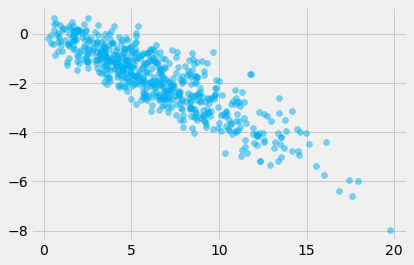

In [682]:
plt.scatter(gps_obs, memory_obs, alpha=.5, color=COLORS[0])

In [718]:
X = pd.DataFrame(np.vstack([gps_obs]).T, columns=['GPS'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(memory_obs, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1930.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          2.46e-189
Time:                        21:29:50   Log-Likelihood:                -596.75
No. Observations:                 600   AIC:                             1198.
Df Residuals:                     598   BIC:                             1206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3032      0.056      5.427      0.0

In [717]:
X = pd.DataFrame(
    np.array(treatments).flatten().T, 
    columns=['GPS']
)

X = sm.add_constant(X, prepend=True)

model = sm.OLS(
    np.array(experiment_results).flatten(), 
    X
)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     7233.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:29:45   Log-Likelihood:                -623.02
No. Observations:                 600   AIC:                             1250.
Df Residuals:                     598   BIC:                             1259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7020      0.058     12.090      0.0

### Naive model 1

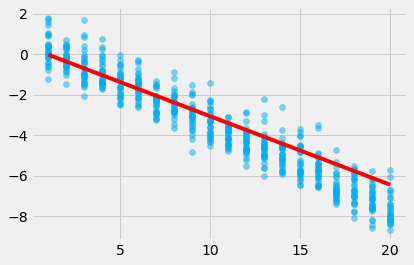

In [726]:
obs_data = pd.DataFrame(np.vstack([gps_obs]).T, columns=['GPS'])

lr_naive = LinearRegression()
lr_naive.fit(
    X=obs_data, 
    y=memory_obs#np.array(experiment_results).flatten()
)

preds_naive = lr_naive.predict(np.array(treatments).flatten())

### Experimental model

In [727]:
obs_data = pd.DataFrame(np.array(treatments).flatten().T, columns=['GPS'])

lr_exp = LinearRegression()
lr_exp.fit(
    X=obs_data, 
    y=np.array(experiment_results).flatten()
)

preds_exp = lr_exp.predict(np.array(treatments).flatten())


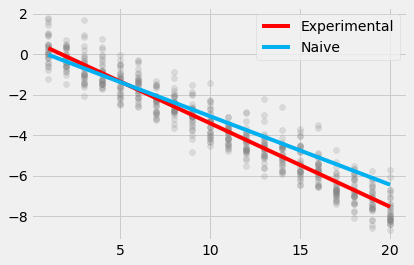

In [739]:
plt.scatter(treatments, experiment_results, alpha=.2, color='gray')
# plt.scatter(gps_obs, memory_obs, alpha=.2, color=COLORS[0])
plt.plot(np.array(treatments).flatten(), preds_exp, label='Experimental', color=COLORS[1])
plt.plot(np.array(treatments).flatten(), preds_naive, label='Naive', color=COLORS[0])

plt.legend()
plt.show()

In [715]:
obs_data_01 = pd.DataFrame(np.vstack([gps_obs]).T, columns=['GPS'])
obs_data_02 = pd.DataFrame(np.vstack([gps_obs, hippocampus_obs]).T, columns=['GPS', 'Hpcmps'])

lr_01 = LinearRegression()
lr_01.fit(
    X=obs_data_01, 
    y=hippocampus_obs
)

lr_02 = LinearRegression()
lr_02.fit(
    X=obs_data_02, 
    y=memory_obs
)

In [719]:
lr_01.get_coefficients()['GPS'] * lr_02.get_coefficients()['Hpcmps']

In [712]:
lr_02.get_coefficients()

const     2.380041e-15
GPS      -1.335737e-16
Hpcmps    1.000000e+00
dtype: float64

In [765]:
from dowhy.causal_model import CausalModel
from sklearn.linear_model import LinearRegression

In [745]:
# Create the graph describing the causal structure
graph = """
graph [
    directed 1
    
    node [
        id "X" 
        label "X"
    ]    
    node [
        id "Z"
        label "Z"
    ]
    node [
        id "Y"
        label "Y"
    ]
    node [
        id "U"
        label "U"
    ]
    
    edge [
        source "X"
        target "Z"
    ]
    
    edge [
        source "Z"
        target "Y"
    ]
    
    edge [
        source "U"
        target "Y"
    ]
    
    edge [
        source "U"
        target "X"
    ]
]
""".replace('\n', '')

In [775]:
N_SAMPLES = 10000

# Generate the data
U = np.random.randn(N_SAMPLES)
X = np.random.randn(N_SAMPLES) + 0.3*U
Z = 0.7*X + 0.3*np.random.randn(N_SAMPLES) 
Y = 0.65*Z + 0.2*U

# Data to df
df = pd.DataFrame(np.vstack([X, Z, Y]).T, columns=['X', 'Z', 'Y'])

In [777]:
# Create a model
model = CausalModel(
    data=df,
    treatment='X',
    outcome='Y',
    graph=graph
)

# Get the estimand
estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(estimand)

In [778]:
# Estimand type: nonparametric-ate

# ### Estimand : 1
# Estimand name: backdoor
# Estimand expression:
#  d        
# ────(E[Y])
# d[X]      
# Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

# ### Estimand : 2
# Estimand name: iv
# No such variable found!

# ### Estimand : 3
# Estimand name: frontdoor
# Estimand expression:
#  ⎡ d       d       ⎤
# E⎢────(Y)⋅────([Z])⎥
#  ⎣d[Z]    d[X]     ⎦
# Estimand assumption 1, Full-mediation: Z intercepts (blocks) all directed paths from X to Y.
# Estimand assumption 2, First-stage-unconfoundedness: If U→{X} and U→{Z} then P(Z|X,U) = P(Z|X)
# Estimand assumption 3, Second-stage-unconfoundedness: If U→{Z} and U→Y then P(Y|Z, X, U) = P(Y|Z, X)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡ d       d       ⎤
E⎢────(Y)⋅────([Z])⎥
 ⎣d[Z]    d[X]     ⎦
Estimand assumption 1, Full-mediation: Z intercepts (blocks) all directed paths from X to Y.
Estimand assumption 2, First-stage-unconfoundedness: If U→{X} and U→{Z} then P(Z|X,U) = P(Z|X)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{Z} and U→Y then P(Y|Z, X, U) = P(Y|Z, X)



In [779]:
# Estimate the effect with front-door
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='frontdoor.linear_regression'
)

estimate.value
# Out[12] 0.511009176530488

In [783]:
# Compute expected output

# Model P(Z|X)
lr_zx = LinearRegression()
lr_zx.fit(
    X=df['X'].values.reshape(-1, 1),
    y=df['Z']
)

# Model P(Y|X, Z)P(X)
lr_yz = LinearRegression()
lr_yz.fit(
    X=df[['Z', 'X']],
    y=df['Y']
)

# Compute the expected causal effect
lr_zx.coef_ * lr_yz.coef_[0]

# Out[13] array([0.45161212])

array([0.45161212])

In [784]:
# Sanity check -> compute naive estimate
lr_naive = LinearRegression()
lr_naive.fit(
    X=df['X'].values.reshape(-1, 1),
    y=df['Y']
)

lr_naive.coef_

# Out[14] array([0.51100918])

array([0.51100918])

In [786]:
import dowhy

In [787]:
dowhy.__version__

'0.6'